In [23]:
import keras
import tensorflow  as tf
import keras.datasets.fashion_mnist as df
import matplotlib.pyplot as plt
import numpy as np 

In [24]:
(x_train, y_train), (x_test, y_test) = df.load_data()

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_test.shape

(10000, 28, 28)

In [27]:
x_train.dtype

dtype('uint8')

In [28]:
x_valid, x_train = x_train[:5000]/255,x_train[5000:]/255
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test=x_test/255


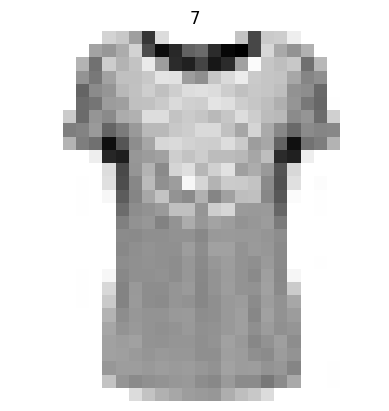

In [29]:
plt.imshow(x_train[1],cmap='binary')
plt.title(y_train[2])
plt.axis('off')
plt.show()

In [30]:
y_train[:5]

array([4, 0, 7, 9, 9], dtype=uint8)

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))



d:\neural_net\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
import shutil
print(shutil.which("dot"))


C:\Program Files (x86)\Graphviz\bin\dot.EXE


In [35]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"


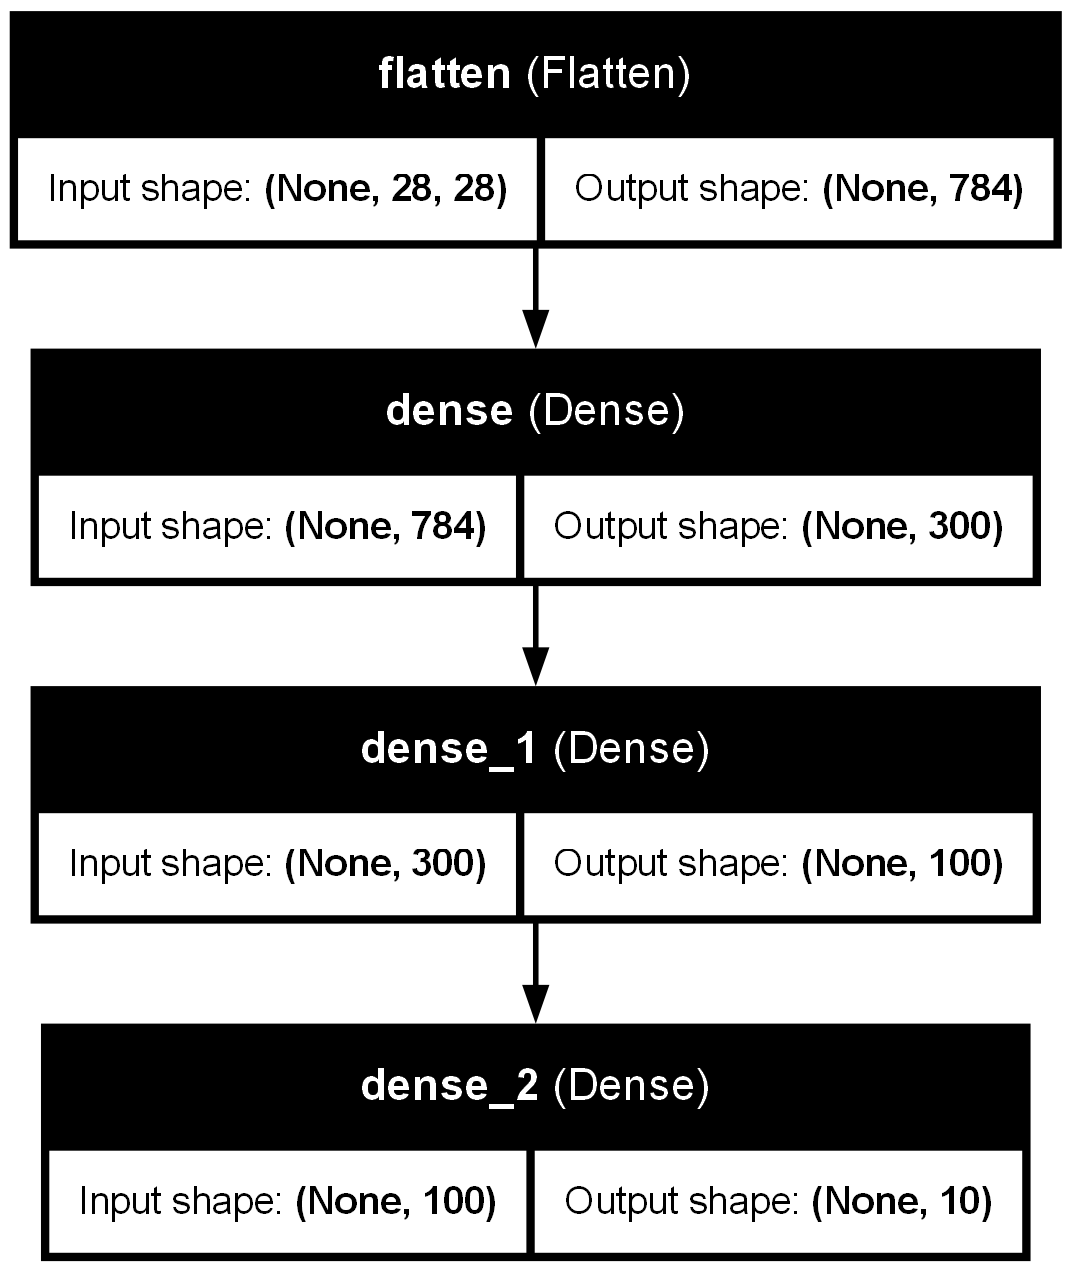

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file="model.png",)


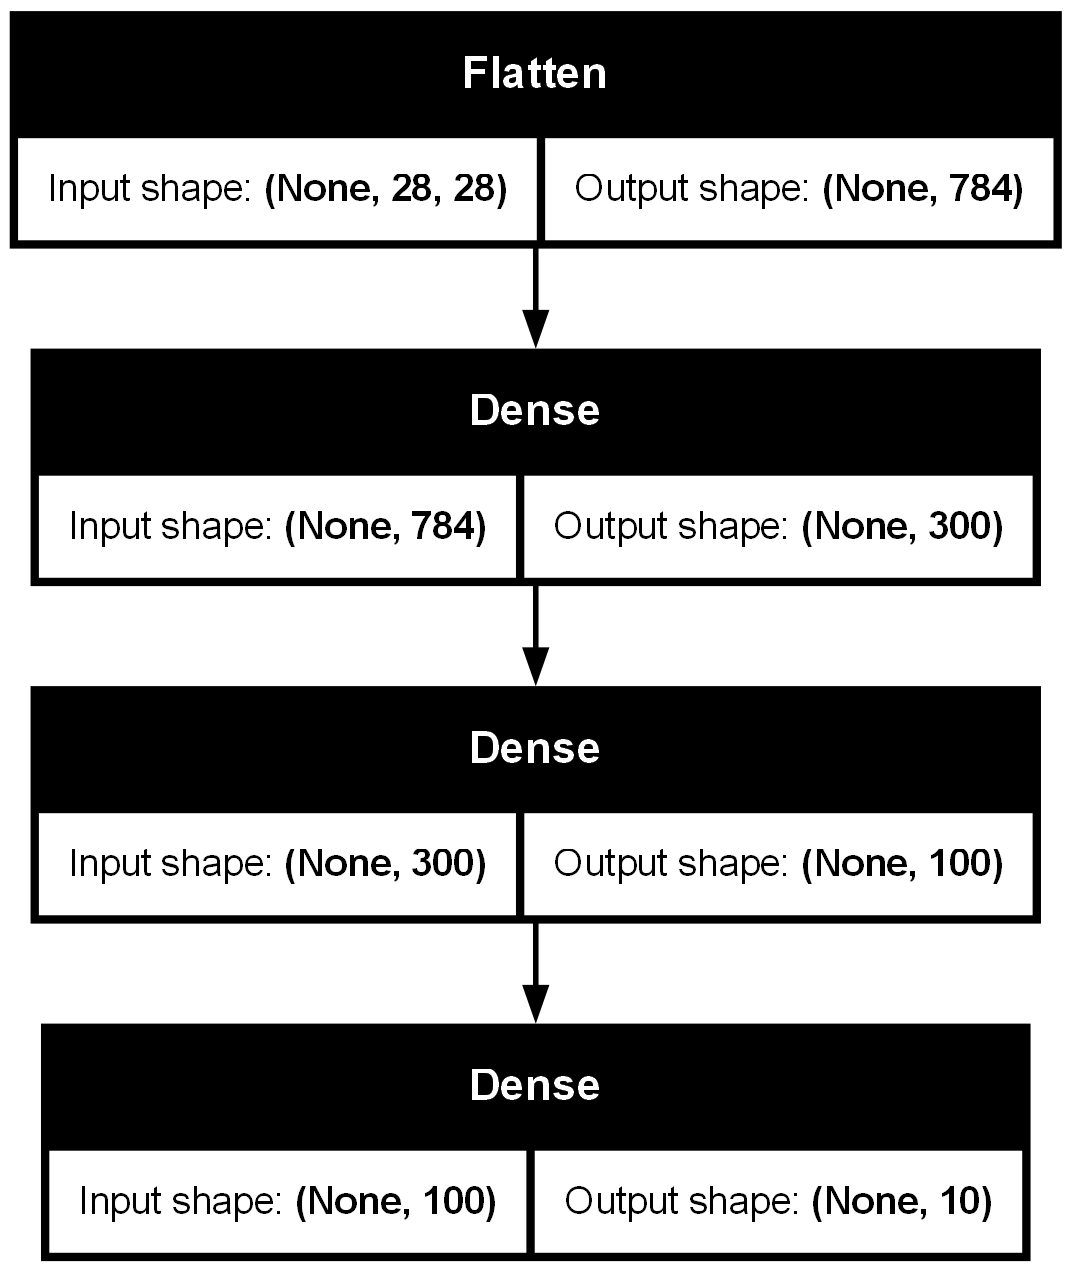

In [37]:
keras.utils.plot_model(model,'my.png',show_shapes=True)

In [38]:
hideen1 = model.layers[1]

In [39]:
hideen1.name

'dense'

In [40]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [41]:
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_valid,y_valid))

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7691 - loss: 0.7083 - val_accuracy: 0.8156 - val_loss: 0.5286
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8300 - loss: 0.4848 - val_accuracy: 0.8410 - val_loss: 0.4640
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8456 - loss: 0.4389 - val_accuracy: 0.8546 - val_loss: 0.4273
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8551 - loss: 0.4110 - val_accuracy: 0.8592 - val_loss: 0.4014
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8623 - loss: 0.3905 - val_accuracy: 0.8660 - val_loss: 0.3843
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8677 - loss: 0.3741 - val_accuracy: 0.8688 - val_loss: 0.3705
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8717 - loss: 0.3603 - val_accuracy: 0.8726 - val_loss: 0.3604
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8758 - loss: 0

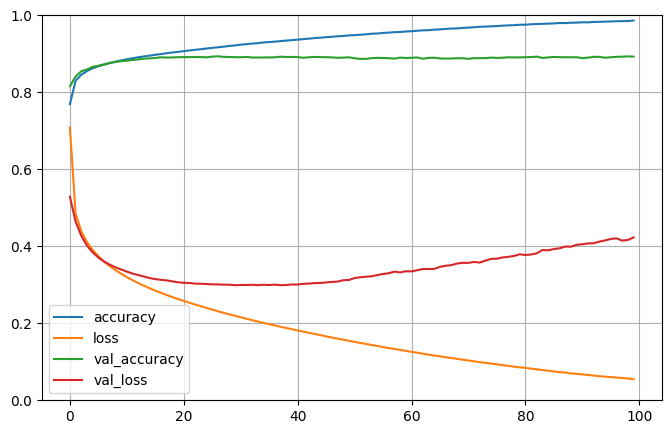

In [42]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()


In [43]:
x_new = x_test[:3]


In [ ]:
plt.figure(figsize=(7.2,2.4))


In [44]:
y_pred = np.argmax(model.predict(x_new),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [45]:
y_pred

array([9, 2, 1])

In [ ]:
y_new = y_test[:3]